# Finding base station neighbours

We will use at first a Gabriel graph (based on the Delaunay triagulation) and then apply some criteria.

## Libraries importation

In [1]:
# Please use these lines in every notebook you create

import os
import sys

# Get the current working directory
current_dir = os.getcwd()

# Get the parent directory of `maps` (which is `src`)
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

# Add `src` to the module search path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from global_variables import *
from python_scripts.miscellaneaous.data_processing import extract_data

In [2]:
import pandas as pd

from python_scripts.graphs.graphs_creation import gabriel_graph
from python_scripts.neighbours_criteria.enhanced_criteria import distance_criterion_enhanced, angle_criterion_enhanced, quadrant_criterion_enhanced
from python_scripts.city.city_utils import mean_distance_to_NN
from python_scripts.ihm.plots import plot_graph
from python_scripts.ihm.maps.map_neighbours import create_method_illustation_map

## Database import and data extraction

In [3]:
df = pd.read_csv("../../database/data.csv", sep=";", decimal=",")
df = extract_data(df, provider=PROVIDER, techno=TECHNO, region=REGION, min_info=True)
df.head()

/tmp/ipykernel_77599/1019069824.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../database/data.csv", sep=";", decimal=",")


,x,y,latitude,longitude,nom_dep,nom_com,site_2g,site_3g,site_4g,site_5g
id_station_anfr,,,,,,,,,,
0272290011,573458.0,6899259.0,49.18056,1.26445,Eure,Fontaine-Bellenger,1,1,1,0
0142290016,454237.0,6903487.0,49.18389,-0.37167,Calvados,Caen,1,1,1,1
0762290018,560709.0,6927372.0,49.43055,1.08028,Seine-Maritime,Rouen,1,1,1,1
0142290003,496750.0,6915926.0,49.31055,0.20500,Calvados,Saint-Gatien-des-Bois,1,1,1,0
0142290018,499454.0,6927334.0,49.41389,0.23667,Calvados,Honfleur,1,1,1,1


## Delaunay triangulation and graph creation

3323


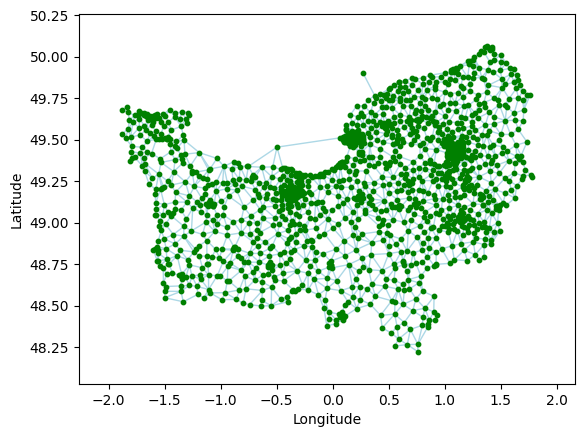

In [4]:
gab_G, pos = gabriel_graph(df)
print(len(gab_G.edges))
plot_graph(gab_G, pos)

## City detection

In [5]:
mean_distances = mean_distance_to_NN(df[['x', 'y']], n_neighbours=N_NEIGH)

## Application of the criteria

nodes - distance: 100%|████████████████████| 1496/1496 [00:01<00:00, 862.49it/s]


3316


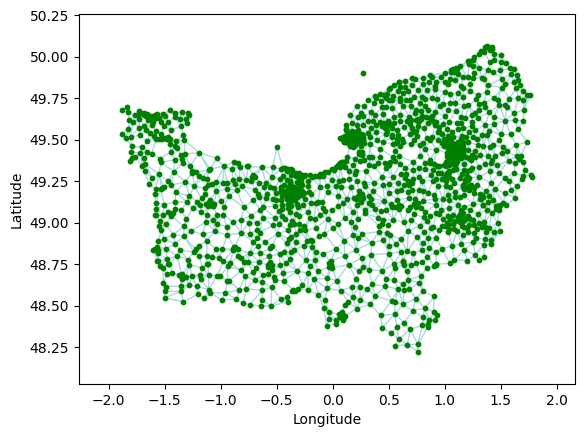

In [6]:
G_dis = distance_criterion_enhanced(gab_G, pos, MEAN_DISTANCE_PARAMS, mean_distances)
print(len(G_dis.edges))
plot_graph(G_dis, pos)

nodes - angles: 100%|█████████████████████| 1496/1496 [00:00<00:00, 4671.90it/s]


3263


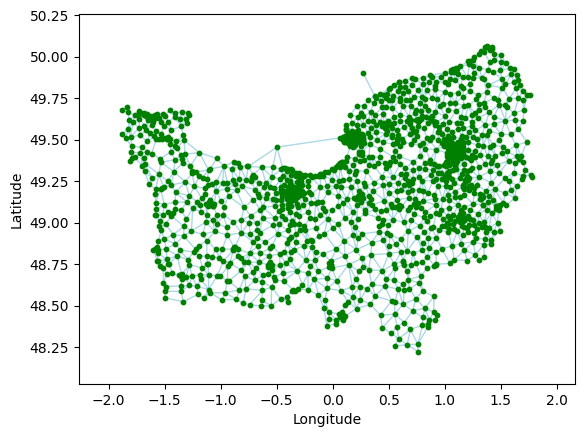

In [7]:
G_ang = angle_criterion_enhanced(gab_G, pos, MEAN_DISTANCE_PARAMS, mean_distances)
print(len(G_ang.edges))
plot_graph(G_ang, pos)

nodes - quadrant: 100%|████████████████████| 1496/1496 [00:04<00:00, 317.37it/s]


2760


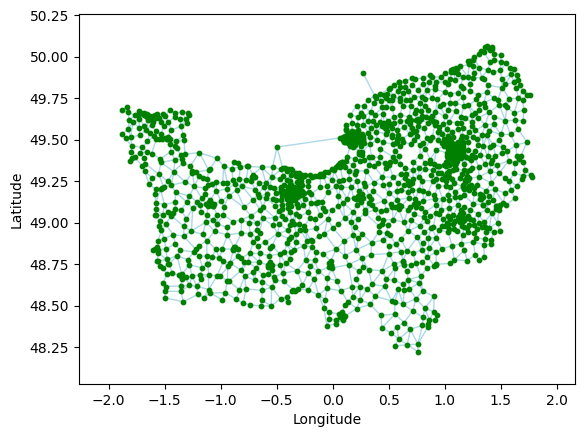

In [8]:
G_qua = quadrant_criterion_enhanced(gab_G, pos, MEAN_DISTANCE_PARAMS, mean_distances)
print(len(G_qua.edges))
plot_graph(G_qua, pos)

nodes - quadrant: 100%|████████████████████| 1496/1496 [00:04<00:00, 324.87it/s]


2751


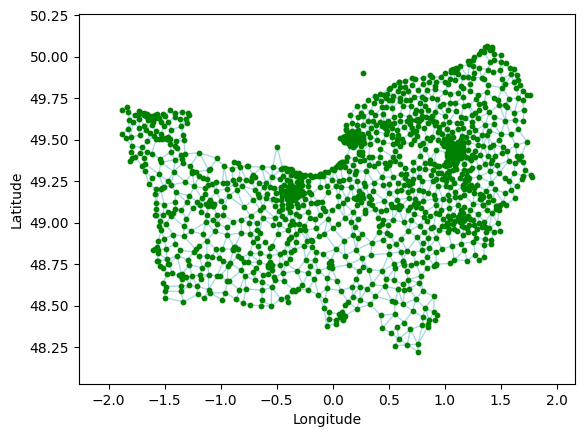

In [9]:
G_tot = distance_criterion_enhanced(gab_G, pos, MEAN_DISTANCE_PARAMS, mean_distances)
G_tot = angle_criterion_enhanced(G_tot, pos, MEAN_DISTANCE_PARAMS, mean_distances)
G_tot = quadrant_criterion_enhanced(G_tot, pos, MEAN_DISTANCE_PARAMS, mean_distances)
print(len(G_tot.edges))
plot_graph(G_tot, pos)

## On a map

In [10]:
create_method_illustation_map(df=df, base_graph=gab_G, base_graph_name='Gabriel graph', neigh_graph=G_tot, mean_distances=mean_distances, mean_distance_params=MEAN_DISTANCE_PARAMS, save_as='gabriel-graph&enhanced-criteria', dis_filt=G_dis, ang_filt=G_ang, qua_filt=G_qua)

KeyError: 'id_station_anfr'